In [42]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
#Read DB
df=pd.read_csv('/content/sample_data/Advertising.csv')
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [44]:
df.keys()

Index(['ID', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [45]:
# Check missing values
print(df.isnull().sum().sort_values(ascending=False))

ID           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [46]:
# Check duplicate values
print(df.duplicated().sum())

0


In [47]:
# Descriptive Summary
print(df.describe())

               ID          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


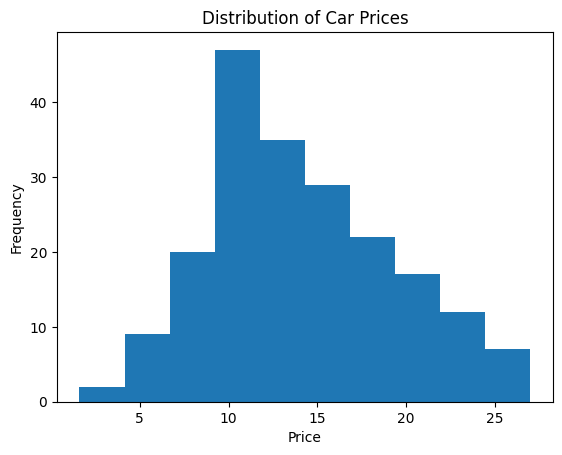

In [48]:
# Visualizations
plt.hist(df['Sales'])  # Plot histogram of car prices
plt.title('Distribution of Car Prices')  # Add title to the plot
plt.xlabel('Price')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
plt.show()  # Display the plot

In [49]:
#Chechk if there is any datatype problem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [50]:
df=pd.get_dummies(df,dtype=int)
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


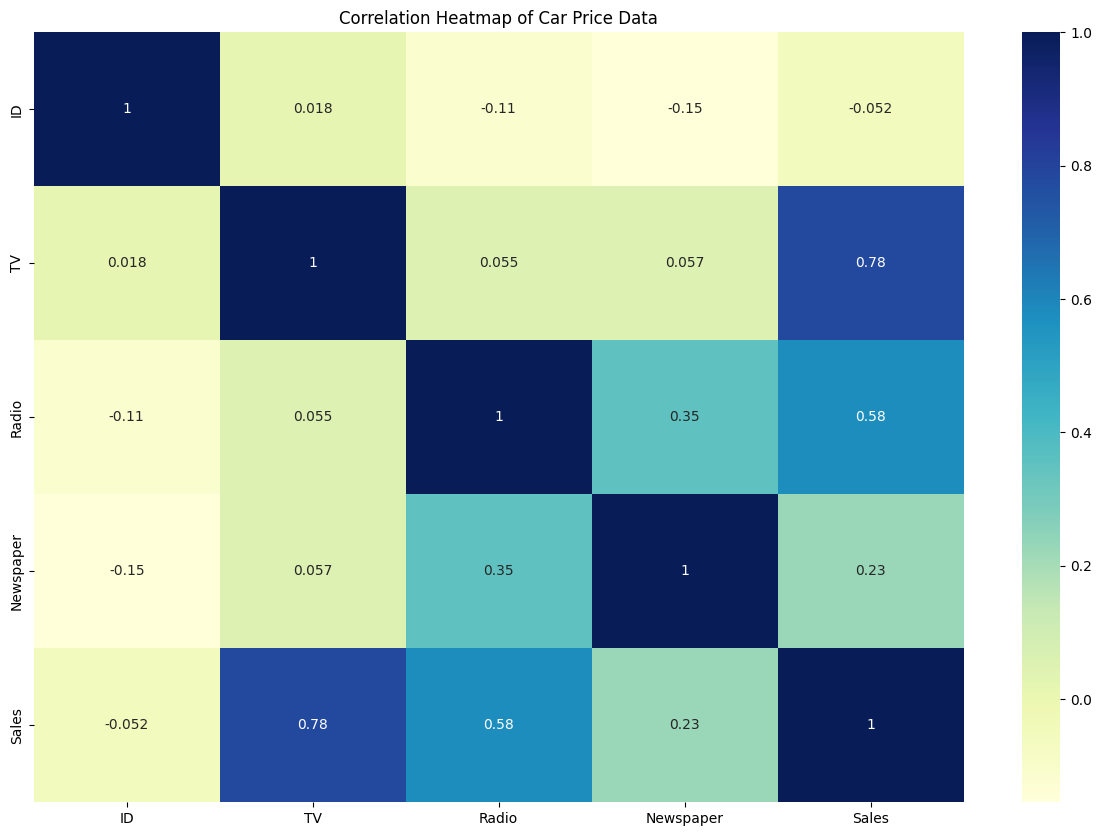

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of Car Price Data')
plt.show()

In [52]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [53]:
df.keys()

Index(['ID', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42 )

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 4), (40, 4), (160,), (40,))

In [57]:
# intialize the model
model=LinearRegression()

# train the model
model.fit(X_train, y_train)

# test the model
y_pred=model.predict(X_test)

In [58]:
# Print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 2.9065270863618125
Coefficients: [0.00064359 0.04471835 0.18925118 0.00304577]


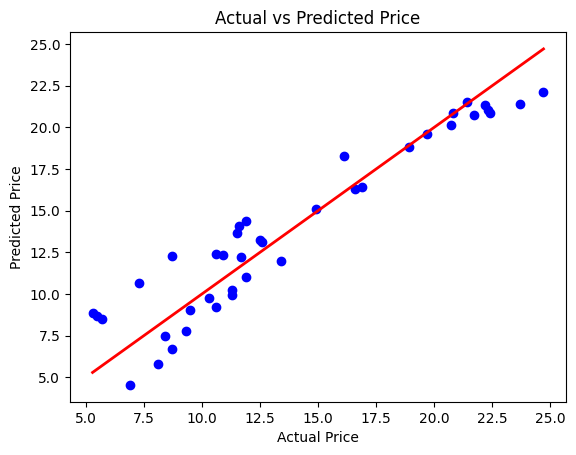

In [59]:
# Predicting the sales
y_pred = model.predict(X_test)

# Plotting actual vs predicted sales
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  3.1990044685889067
Root Mean Squared Error:  1.7885761008659673
Mean Absolute Error:  1.465060105010293
R2 Score:  0.898648915141708


In [61]:
import pickle
pickle.dump(model, open('model_Advertising_Prediction.pkl', 'wb'))
print('Model saved as linear_regression_Advertising_model.pkl')

Model saved as linear_regression_Advertising_model.pkl


In [62]:
from google.colab import files
pickle.dump(model, open('model_Advertising_model.pkl', 'wb'))
print('Model saved as model_Advertising_model.pkl')

# Descargar el archivo a tu computadora
files.download('model_Advertising_model.pkl')

Model saved as model_Advertising_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>